In [74]:
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt
from scipy.linalg import logm, expm
from qiskit.quantum_info import Operator, state_fidelity
from qiskit import QuantumCircuit
from qiskit_aer import StatevectorSimulator
from qiskit import Aer
from qiskit.circuit.library import QFT
from qiskit.visualization import plot_histogram

from tools.classical import *
from tools.quantum import *

def brute_prepare_gaussian_state(num_energy_bits: int, sigma: float) -> QuantumCircuit:
    """An early implementation for low number of energy register qubits. For more qubits we would use QSVT maybe."""
    #FIXME: This is wrong. Maybe due to extra factors or the unit goes into the sigma, and leads to unexpected form for
    # the gaussian
    #! Ah currently we have assigned gauss amplitudes to the bitstrings that have only one '1' in them, since
    #! that's what it means going from element to element from top to bottom in a statevector.
    
    # Time labels in computational basis
    decimal_time_labels = list(range(2**(num_energy_bits - 1)))
    decimal_time_labels.extend(list(range(- 2**(num_energy_bits - 1), 0)))
    
    gauss_amplitude = lambda decimal_time: np.exp(-(decimal_time ** 2) / (4 * sigma ** 2))
    amplitudes = [gauss_amplitude(decimal_time) for decimal_time in decimal_time_labels]
    # Normalize 
    amplitudes = amplitudes / np.linalg.norm(amplitudes)
    print(amplitudes)
    
    prep_circ = QuantumCircuit(num_energy_bits, name="gauss")
    prep_circ.initialize(amplitudes, range(num_energy_bits))
    
    return prep_circ

def signed_order_counts(counts: dict, num_energy_bits: int) -> dict:
    bitstrings_pos = [bin(i)[2:].zfill(num_energy_bits - 1) for i in range(2**(num_energy_bits - 1))]
    bitstrings_pos = ['0' + bitstring for bitstring in bitstrings_pos]
    bitstrings_neg = [bin(i)[2:].zfill(num_energy_bits - 1) for i in range(2**(num_energy_bits - 1))]
    bitstrings_neg = ['1' + bitstring for bitstring in bitstrings_neg]
    bitstrings_ordered = bitstrings_neg + bitstrings_pos
    for bitstring in bitstrings_ordered:
        if bitstring not in counts.keys():
            counts[bitstring] = 0
    counts_ordered = {bitstrings_ordered[i]: counts[bitstrings_ordered[i]] 
                    for i in range(len(bitstrings_ordered)) if bitstrings_ordered[i] in counts.keys()}
    return counts_ordered

# Statevector.from_label(bitstring)
    

In [86]:
num_energy_bits = 4
sigma = 3
qr_energy = QuantumRegister(num_energy_bits, name="qr_w")
cr_energy = ClassicalRegister(num_energy_bits, name="cr_w")
circ = QuantumCircuit(qr_energy, cr_energy)
gauss = brute_prepare_gaussian_state(num_energy_bits, sigma)

circ.compose(gauss, qr_energy, inplace=True)
circ.measure(qr_energy, cr_energy)
tr_circ = transpile(circ, basis_gates=['u', 'cx'], optimization_level=3)

simulator = Aer.get_backend('statevector_simulator')
shots = 10000
job = simulator.run(tr_circ, shots=shots)
counts = job.result().get_counts()
counts_ordered = signed_order_counts(counts, num_energy_bits)
print(counts_ordered)

[0.36617321 0.3561417  0.32766618 0.28517598 0.23478308 0.18284925
 0.13470759 0.09387793 0.06188815 0.09387793 0.13470759 0.18284925
 0.23478308 0.28517598 0.32766618 0.3561417 ]
{'1000': 37, '1001': 94, '1010': 198, '1011': 326, '1100': 542, '1101': 769, '1110': 1005, '1111': 1259, '0000': 1374, '0001': 1305, '0010': 1121, '0011': 800, '0100': 560, '0101': 311, '0110': 209, '0111': 90}


<BarContainer object of 16 artists>

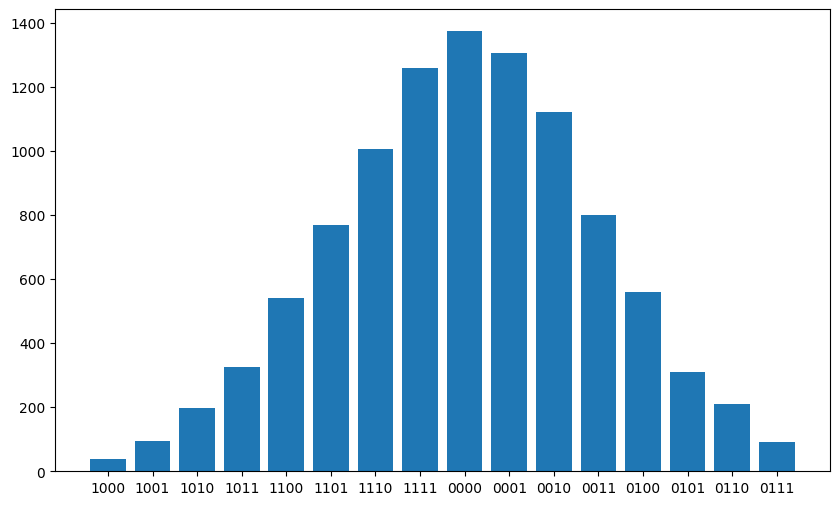

In [87]:
plt.figure(figsize=(10,6))
plt.bar(counts_ordered.keys(), counts_ordered.values())

<BarContainer object of 16 artists>

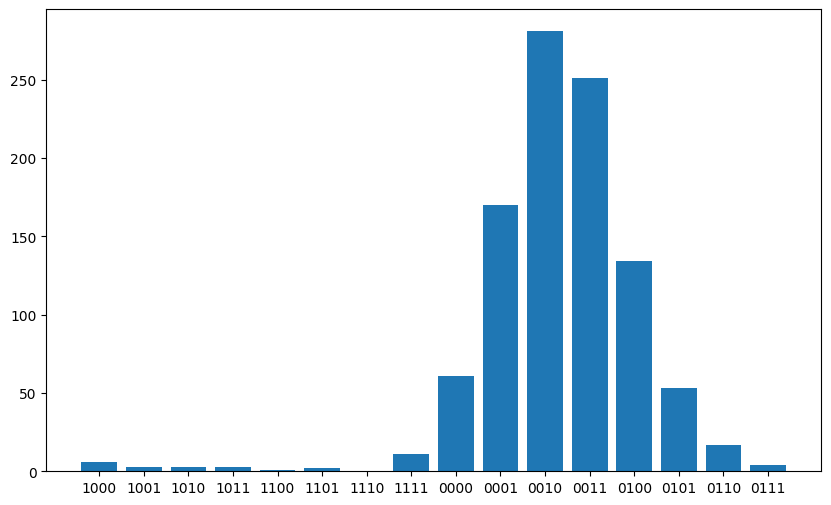

In [76]:
plt.figure(figsize=(10,6))
plt.bar(counts_ordered.keys(), counts_ordered.values())


<BarContainer object of 16 artists>

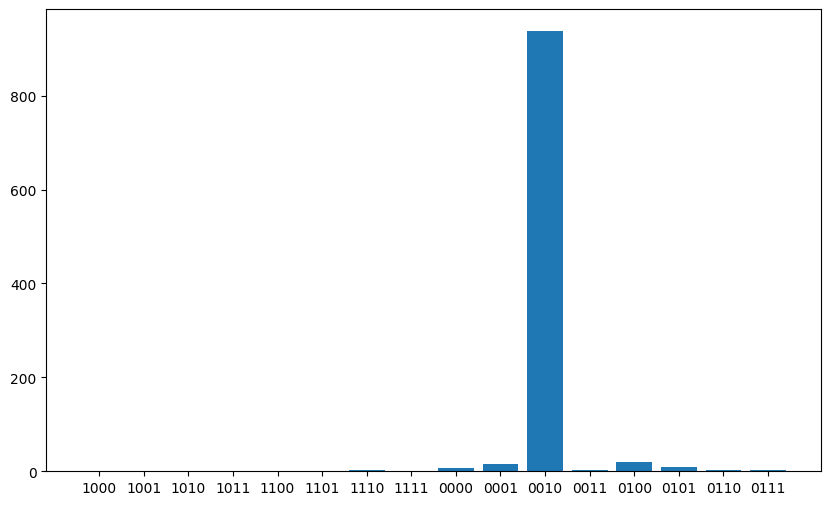

In [77]:
counts = {'0010': 937, '0100': 20, '0001': 16, '0101': 9, '0000': 6, '1110': 2, '0110': 2, '0011': 2, '0111': 2, '1101': 1, '1111': 1, '1001': 1, '1100': 1}
counts_ordered = signed_order_counts(counts, num_energy_bits)
plt.figure(figsize=(10,6))
plt.bar(counts_ordered.keys(), counts_ordered.values())
# No gauss

<BarContainer object of 16 artists>

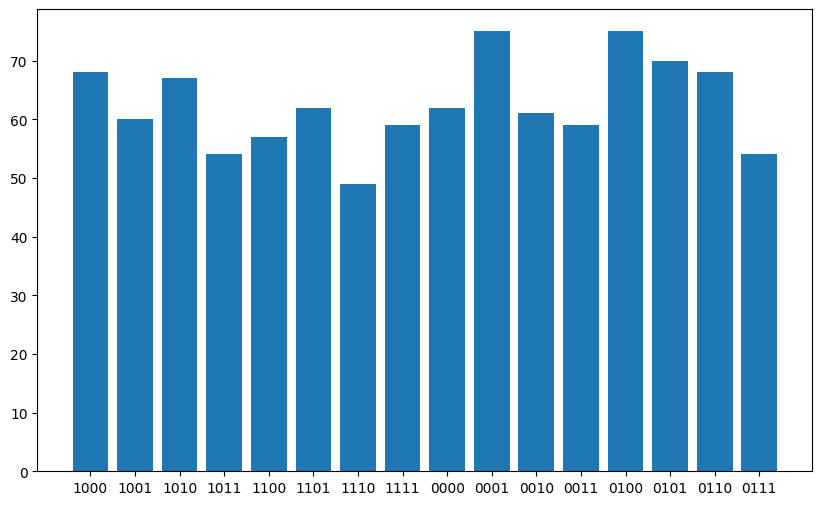

In [78]:
counts = {'0001': 75, '0100': 75, '0101': 70, '0110': 68, '1000': 68, '1010': 67, '1101': 62, '0000': 62, '0010': 61, '1001': 60, '1111': 59, '0011': 59, '1100': 57, '1011': 54, '0111': 54, '1110': 49}
counts_ordered = signed_order_counts(counts, num_energy_bits)
plt.figure(figsize=(10,6))
plt.bar(counts_ordered.keys(), counts_ordered.values())

<BarContainer object of 16 artists>

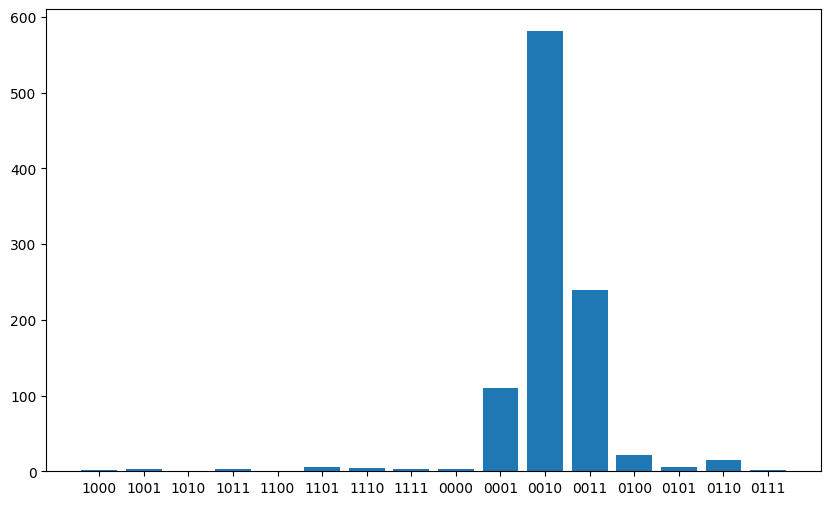

In [79]:
counts = {'0010': 581, '0011': 240, '0001': 110, '0100': 22, '0110': 15, '0101': 6, '1101': 5, '1110': 4, '0000': 3, '1011': 3, '1001': 3, '1111': 3, '1000': 2, '0111': 2, '1100': 1}
counts_ordered = signed_order_counts(counts, num_energy_bits)
plt.figure(figsize=(10,6))
plt.bar(counts_ordered.keys(), counts_ordered.values())

<BarContainer object of 16 artists>

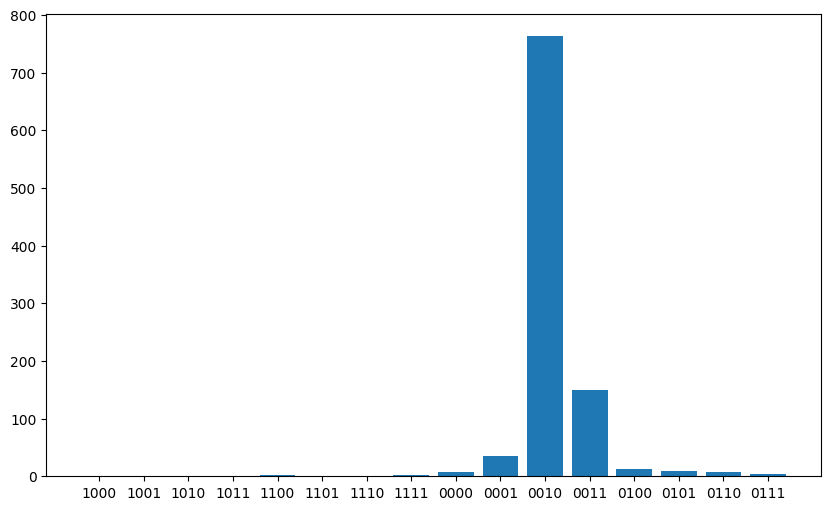

In [88]:
counts = {'0010': 763, '0011': 149, '0001': 36, '0100': 13, '0101': 10, '0110': 7, '0000': 7, '0111': 4, '1111': 3, '1100': 3, '1011': 1, '1110': 1, '1010': 1, '1000': 1, '1001': 1}
counts_ordered = signed_order_counts(counts, num_energy_bits)
plt.figure(figsize=(10,6))
plt.bar(counts_ordered.keys(), counts_ordered.values())

Eigstate $7$

$\omega = -0.256$, $\sigma = 0$

The main contribution comes from $E = -0.375$ which is the bit state '1010'. But the actually jump energy is closer to '1100'

<BarContainer object of 16 artists>

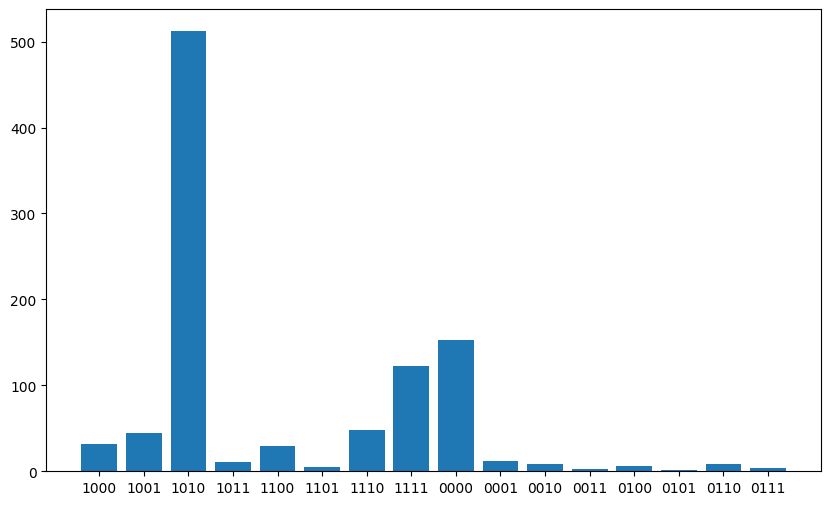

In [89]:
counts = {'1010': 512, '0000': 153, '1111': 123, '1110': 48, '1001': 45, '1000': 32, '1100': 29, '0001': 12, '1011': 11, '0010': 8, '0110': 8, '0100': 6, '1101': 5, '0111': 4, '0011': 3, '0101': 1}
counts_ordered = signed_order_counts(counts, num_energy_bits)
plt.figure(figsize=(10,6))
plt.bar(counts_ordered.keys(), counts_ordered.values())

$\sigma = 2$

<BarContainer object of 16 artists>

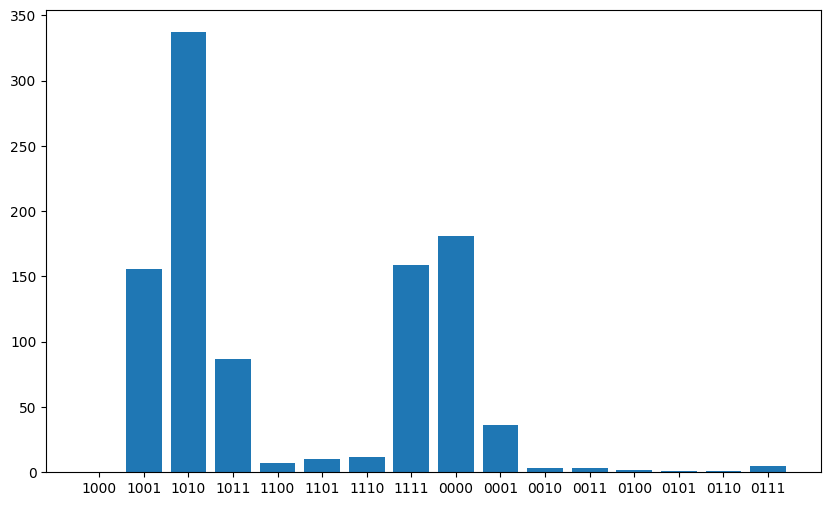

In [90]:
counts = {'1010': 337, '0000': 181, '1111': 159, '1001': 156, '1011': 87, '0001': 36, '1110': 12, '1101': 10, '1100': 7, '0111': 5, '0011': 3, '0010': 3, '0100': 2, '0110': 1, '0101': 1}
counts_ordered = signed_order_counts(counts, num_energy_bits)
plt.figure(figsize=(10,6))
plt.bar(counts_ordered.keys(), counts_ordered.values())

$\sigma = 3$

<BarContainer object of 16 artists>

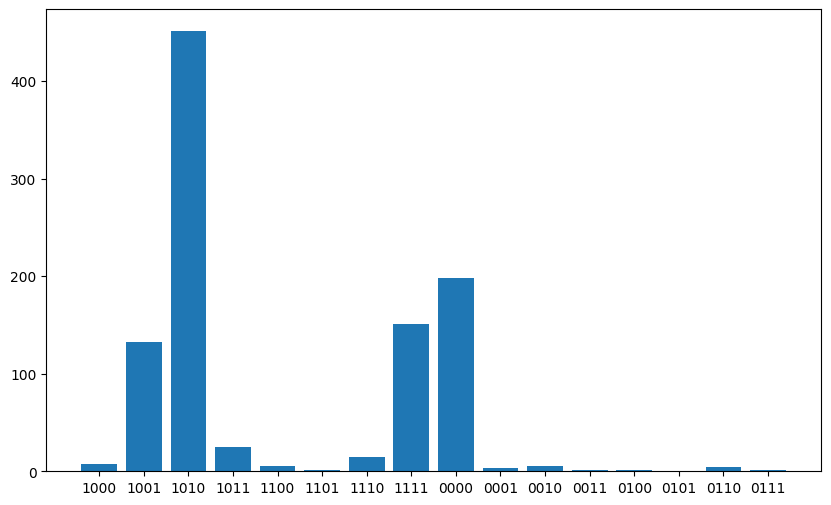

In [91]:
code = {'1010': 451, '0000': 198, '1111': 151, '1001': 132, '1011': 25, '1110': 15, '1000': 7, '0010': 5, '1100': 5, '0110': 4, '0001': 3, '0111': 1, '1101': 1, '0011': 1, '0100': 1}
code_ordered = signed_order_counts(code, num_energy_bits)
plt.figure(figsize=(10,6))
plt.bar(code_ordered.keys(), code_ordered.values())

$\sigma = 4$